# Data Visualization

In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.preprocessing import normalize
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import pickle as pkl
from itertools import chain

train_dict = pkl.load(open("data/train.pkl", "rb"))
val_dict = pkl.load(open("data/val.pkl", "rb"))
test_dict = pkl.load(open("data/test.pkl", "rb"))
print("keys in train_dict:", train_dict.keys())
print("keys in val_dict:", val_dict.keys())
print("keys in test_dict:", test_dict.keys())


keys in train_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in val_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in test_dict: dict_keys(['id', 'word_seq'])


## Max Sentence length for the Data Before Bert Tokenizer

In [13]:
a =[]
for sent in test_dict["word_seq"]:
    length = 0
    for w in sent:
        if w != "_w_pad_":
            length += 1
    a.append(length)
a = np.array(a)
(a <= 128).all()

True

## Most Prevalent Tags

{'O': 2110794, '_t_pad_': 229579, 'GENE_OR_GENOME': 146376, 'CHEMICAL': 145611, 'DISEASE_OR_SYNDROME': 77719, 'DATE': 33373, 'CORONAVIRUS': 28403, 'ORG': 27371, 'CARDINAL': 25852, 'CELL': 20685}


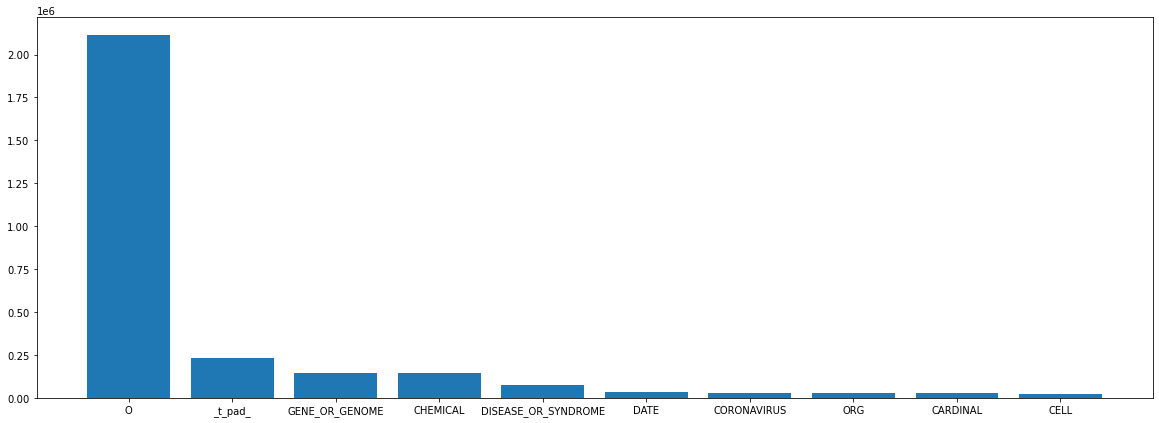

In [5]:
d = dict()

all_tag_seq = list(chain(*train_dict["tag_seq"]))

for tag in set(all_tag_seq):
    d[tag] = list(all_tag_seq).count(tag)

sorted_most = {k:v for k, v in sorted(d.items(), key=lambda x: x[1], reverse=True)[:10]}
print(sorted_most)

plt.figure(figsize=(20,7))
plt.bar(np.arange(10), sorted_most.values())
plt.xticks(np.arange(10), sorted_most.keys());

## Plot Confusion Matrix

In [8]:
ground_file = "data/val.pkl"
pred_file = 'biobert_large_val_preds2.csv'

file_dict = pkl.load(open(ground_file, "rb"))
file_preds = pd.read_csv(pred_file)

preds = np.array([json.loads(line) for line in file_preds["labels"]])
tags = np.array(file_dict["tag_seq"])
preds_flatten = preds.flatten()
tags_flatten = tags.flatten()
non_padding_idx = np.where(tags_flatten!="_t_pad_")[0]

a = confusion_matrix(tags_flatten[non_padding_idx], preds_flatten[non_padding_idx])
a = normalize(a)

df  = pd.DataFrame(a, index=np.sort(np.unique(preds_flatten)), columns=np.sort(np.unique(preds_flatten)))

<AxesSubplot:title={'center':'bert_large + Dense'}>

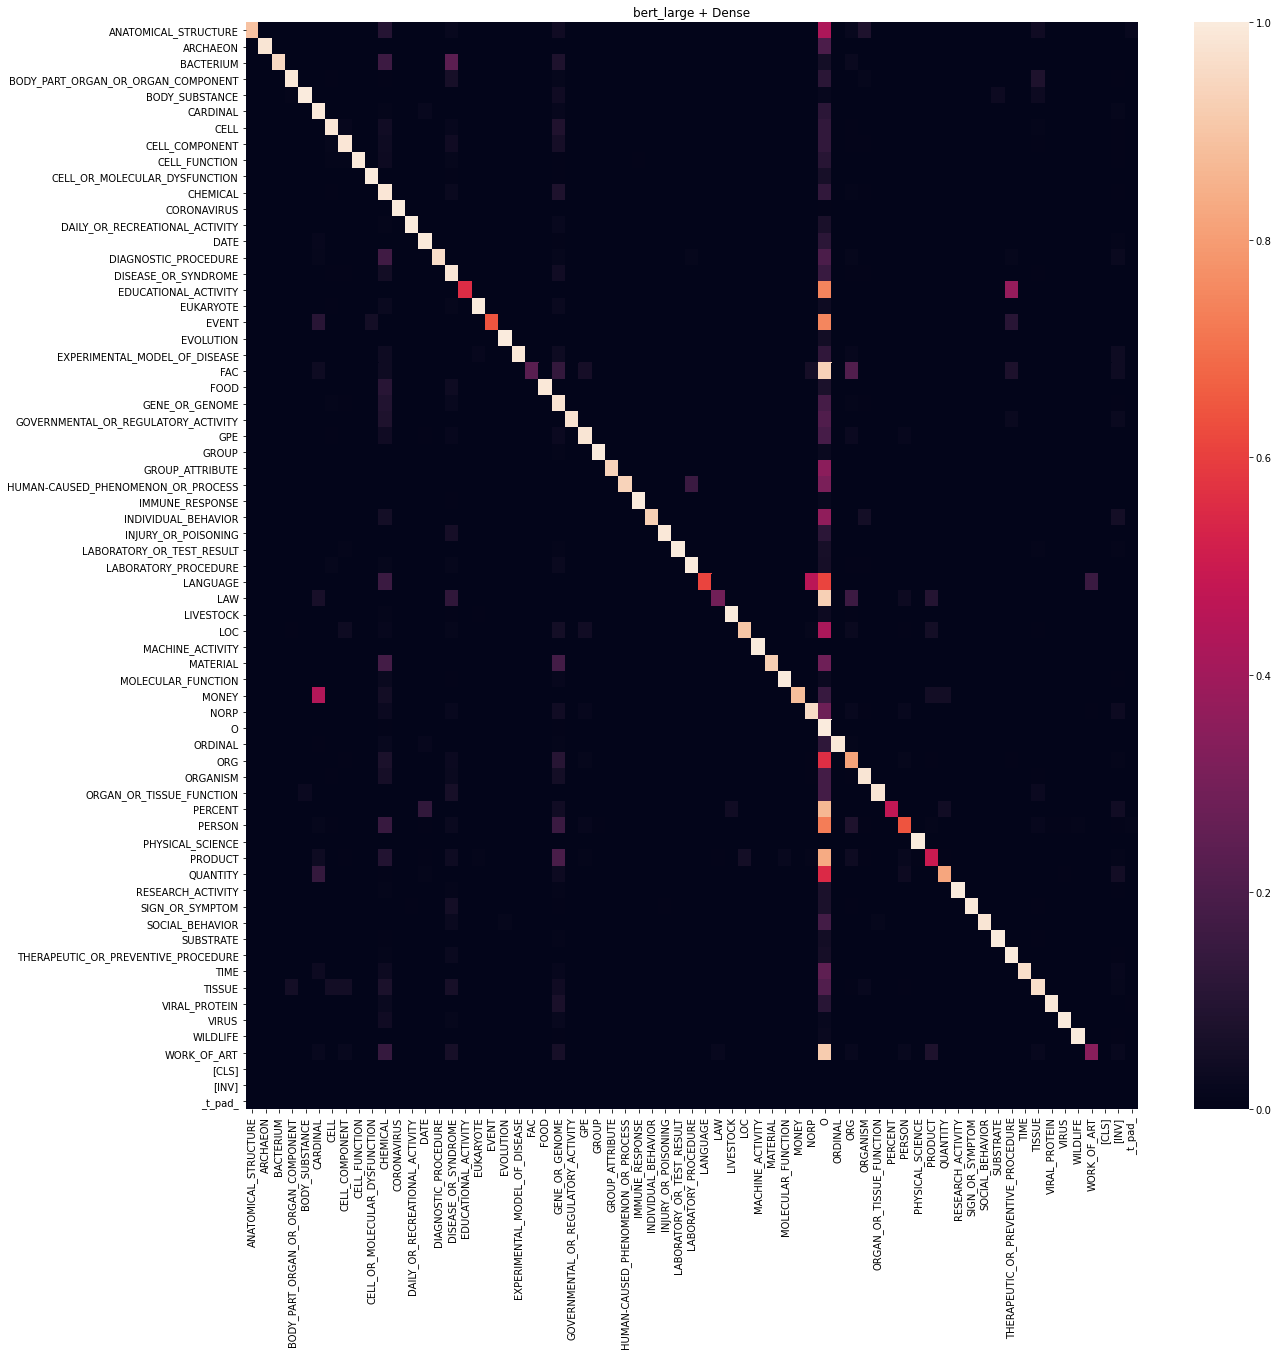

In [7]:
plt.figure(figsize = (20,20))
plt.title("bert_large + Dense")
sn.heatmap(df);

## F1 Score

Forgot to calculate F1 score during training session, so doing it separately with predicted csv files.

In [3]:
from sklearn.metrics import f1_score

In [29]:
def f1(ground_file, pred_file):
    file_dict = pkl.load(open(ground_file, "rb"))
    file_preds = pd.read_csv(pred_file)

    preds = np.array([json.loads(line) for line in file_preds["labels"]])
    tags = np.array(file_dict["tag_seq"])
    preds_flatten = preds.flatten()
    tags_flatten = tags.flatten()
    non_padding_idx = np.where(tags_flatten!="_t_pad_")[0]

    return f1_score(tags_flatten[non_padding_idx], preds_flatten[non_padding_idx], average='macro')

In [30]:
ground_file = "data/val.pkl"
pred_file = 'results/biobert_large_val_preds2.csv'
f1(ground_file, pred_file)

0.7369896907607145

In [31]:
ground_file = "data/val.pkl"
pred_file = 'results/bert_large_val_preds2.csv'
f1(ground_file, pred_file)

0.7244903399688125

In [33]:
ground_file = "data/val.pkl"
pred_file = 'results/bert_base_val_preds.csv'
f1(ground_file, pred_file)

0.703343157060143

In [38]:
ground_file = "data/val.pkl"
pred_file = 'results/biobert_base_gru/biobert_base_gru_val_preds.csv'
f1(ground_file, pred_file)

0.6487283305187546

## Plot history

In [39]:
import json

In [50]:
with open('results/biobert_large_history.json') as json_file: 
    biobert_hist = json.load(json_file)

with open('results/bert_large_cased_history.json') as json_file: 
    bert_hist = json.load(json_file)

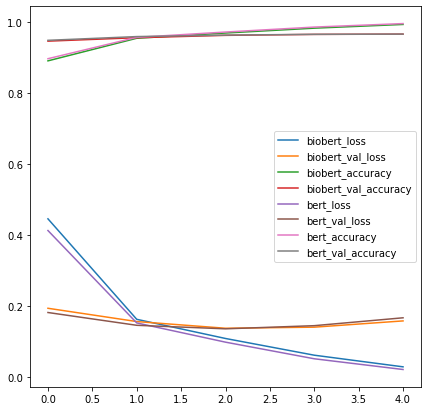

In [52]:
plt.figure(figsize=(7,7))
plt.plot(biobert_hist['loss'], label='biobert_loss')
plt.plot(biobert_hist['val_loss'], label='biobert_val_loss')
plt.plot(biobert_hist['accuracy'], label='biobert_accuracy')
plt.plot(biobert_hist['val_accuracy'], label='biobert_val_accuracy')
plt.plot(bert_hist['loss'], label='bert_loss')
plt.plot(bert_hist['val_loss'], label='bert_val_loss')
plt.plot(bert_hist['accuracy'], label='bert_accuracy')
plt.plot(bert_hist['val_accuracy'], label='bert_val_accuracy')
plt.legend();